In [3]:
import pyspark

from pyspark.sql import SparkSession
from pyspark import SparkContext,SparkConf
sc = SparkContext.getOrCreate(SparkConf())

from pyspark.sql import SQLContext

sqlcontext = SQLContext(sc)

In [4]:
bicing= sqlcontext.read.json(r"C:\Users\Poojitha\Desktop\protofolio\bicing.json")

#Count number of rows
bicing.count()

465

In [5]:
bicing.printSchema()

root
 |-- altitude: string (nullable = true)
 |-- bikes: string (nullable = true)
 |-- id: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- nearbyStations: string (nullable = true)
 |-- slots: string (nullable = true)
 |-- status: string (nullable = true)
 |-- streetName: string (nullable = true)
 |-- streetNumber: string (nullable = true)
 |-- type: string (nullable = true)



In [39]:
bicing.show(20)

+--------+-----+---+---------+---------+------------------+-----+------+--------------------+------------+----+
|altitude|bikes| id| latitude|longitude|    nearbyStations|slots|status|          streetName|streetNumber|type|
+--------+-----+---+---------+---------+------------------+-----+------+--------------------+------------+----+
|      21|    1|  1|41.397952| 2.180042| 24, 369, 387, 426|   21|   OPN|Gran Via Corts Ca...|         760|BIKE|
|      21|    2|  2| 41.39553|  2.17706|360, 368, 387, 414|   24|   OPN|Roger de Flor/ Gr...|         126|BIKE|
|      21|   15|  3|41.393699| 2.181137|    4, 6, 119, 419|   10|   OPN|             Ali Bei|          44|BIKE|
|      21|    9|  4| 41.39347|  2.18149|    3, 5, 359, 419|   10|   OPN|               Ribes|          13|BIKE|
|      16|    2|  5|41.391075| 2.180223|    6, 7, 359, 418|   36|   OPN|   Pg Lluís Companys|          11|BIKE|
|      16|    7|  6|41.391349|  2.18061|    5, 8, 359, 419|   31|   OPN|   Pg Lluís Companys|          1

In [7]:
#Show id, bikes,slots

bicing.select(bicing['id'], bicing['bikes'], bicing['slots']).show()

+---+-----+-----+
| id|bikes|slots|
+---+-----+-----+
|  1|    1|   21|
|  2|    2|   24|
|  3|   15|   10|
|  4|    9|   10|
|  5|    2|   36|
|  6|    7|   31|
|  7|    4|   20|
|  8|    2|   25|
|  9|    4|   13|
| 10|    2|   28|
| 11|   17|    4|
| 12|   29|    1|
| 13|   30|    3|
| 14|    2|   19|
| 15|    3|   16|
| 16|    3|   18|
| 17|    3|   18|
| 18|   22|   10|
| 19|   10|   18|
| 20|    6|   13|
+---+-----+-----+
only showing top 20 rows



In [8]:
# Create a temporary view of dataframe
bicing.createOrReplaceTempView("stations")

In [9]:
sqlcontext.sql("select id, bikes, slots from stations").show()

+---+-----+-----+
| id|bikes|slots|
+---+-----+-----+
|  1|    1|   21|
|  2|    2|   24|
|  3|   15|   10|
|  4|    9|   10|
|  5|    2|   36|
|  6|    7|   31|
|  7|    4|   20|
|  8|    2|   25|
|  9|    4|   13|
| 10|    2|   28|
| 11|   17|    4|
| 12|   29|    1|
| 13|   30|    3|
| 14|    2|   19|
| 15|    3|   16|
| 16|    3|   18|
| 17|    3|   18|
| 18|   22|   10|
| 19|   10|   18|
| 20|    6|   13|
+---+-----+-----+
only showing top 20 rows



In [10]:
#Count Mechanical bikes
sqlcontext.sql("select count(*) from stations where type='BIKE'").show()

+--------+
|count(1)|
+--------+
|     419|
+--------+



In [22]:
bar= sqlcontext.sql("select type, count(*) as total from stations group by type")
bar.show()

+-------------+-----+
|         type|total|
+-------------+-----+
|BIKE-ELECTRIC|   46|
|         BIKE|  419|
+-------------+-----+



In [28]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt

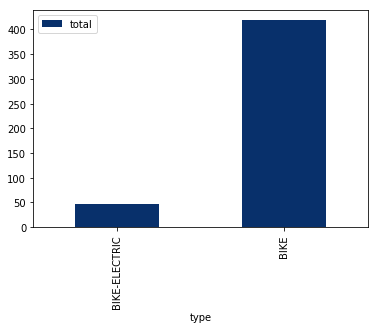

In [35]:
df1=bar.toPandas()
df1.plot(kind='bar',x='type',y='total',colormap='Blues_r')

In [32]:
bike_slot= sqlcontext.sql("select type,count(slots) as available from stations where status='OPN' group by type")
bike_slot.show()

+-------------+---------+
|         type|available|
+-------------+---------+
|BIKE-ELECTRIC|       42|
|         BIKE|      418|
+-------------+---------+



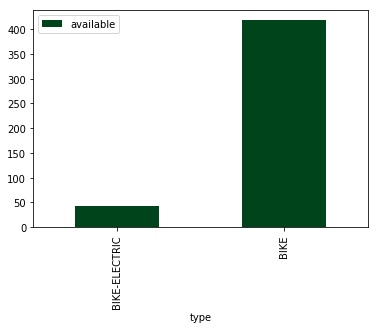

In [36]:
df2= bike_slot.toPandas()
df2.plot(kind='bar',x='type',y='available',colormap='Greens_r')

In [38]:
# bikes available at the station with id 1
sqlcontext.sql("select count(bikes) from stations where id='1'").show()

+------------+
|count(bikes)|
+------------+
|           1|
+------------+

